# Iris Dataset with decision tree classification

## Import of libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

## Loading and preparation of the dataset

In [111]:
#Load iris dataset
iris = load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [112]:
print(iris.target[:5])

[0 0 0 0 0]


In [113]:
#Conversion to pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target

In [114]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [115]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['Target']]

## Splitting the data and training the model

We use the sklearn train_test_split function to split the dataset. This function takes in our data and a specified test size or proportion, and returns two datasets: one for training and one for testing. The training dataset is used to fit our model, while the test dataset is used to evaluate its performance.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=104, shuffle=True)

In this approach, a decision tree classifier is utilized for the classification of classes. The decision tree generates a sequence of conditions that effectively categorize the data into their respective classes. 

In [117]:
dc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

The decision tree class instance contains three variables; criterion, max_depth and random_state. The criterion is the function to measure the quality of a split. The supported types are “gini” for the Gini impurity, “log_loss” and “entropy”. The max_depth variable is a way to preprune a decision tree, in other words, if a tree is already as predicitve as possible at a depth, it will not continue to split. The random_state variable selects which feature to split if both splits are equally as good. 

In [118]:
dc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [119]:
y_pred = dc.predict(x_test)

## Metrics

In [126]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: ', round(accuracy*100,3), '%')
print('F1 score: ', round(f1*100,3), '%')

Accuracy:  97.368 %
F1 score:  97.326 %


## Decision Tree Visualization

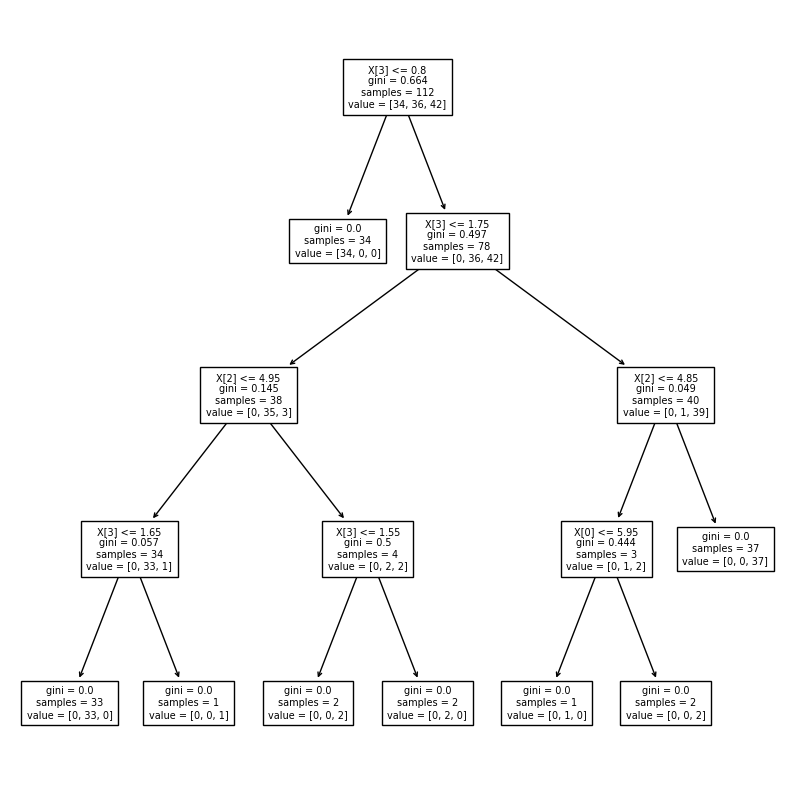

In [124]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dc, fontsize=7)
plt.show()